In [1]:
import json
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import jax
plt.style.use(['science', 'grid'])

api = wandb.Api()

In [2]:
run_paths = {
    'pp': {
        'singlet': 'tum_daml_nicholas/ngao_cumulene_pp/vwpls1z7',
        'triplet': 'tum_daml_nicholas/ngao_cumulene_pp/uic1g5kh',
    },
    'none': {
        'singlet': 'tum_daml_nicholas/ngao_cumulene_pp/5n5y0lxi',
        'triplet': 'tum_daml_nicholas/ngao_cumulene_pp/ix6l25nf'
    }
}

In [3]:
runs = jax.tree_map(lambda x: pd.DataFrame(api.run(x).scan_history(keys=['opt/E_smooth', 'opt/E_std', 'opt/E'])), run_paths)

Text(0.5, 1.0, 'C16H4')

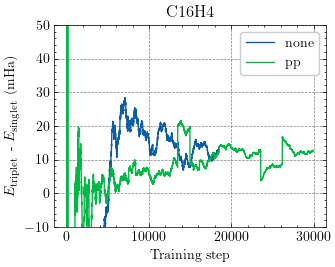

In [4]:
for label, run in runs.items():
    singlet = run['singlet']['opt/E_smooth']
    triplet = run['triplet']['opt/E_smooth']
    delta = (triplet - singlet) * 1000
    delta.plot(label=label)
plt.legend()
plt.ylabel('$E_\\text{triplet}$ - $E_\\text{singlet}$ (mHa)')
plt.ylim(-10, 50)
plt.xlabel('Training step')
plt.title('C16H4')

Text(0.5, 1.0, 'C16H4')

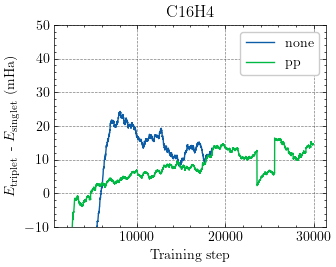

In [8]:
for label, run in runs.items():
    singlet = run['singlet']['opt/E']
    triplet = run['triplet']['opt/E']
    delta = (triplet - singlet) * 1000
    mask = (delta < delta.std() * 10)
    delta = delta[mask].rolling(2000).mean()
    delta.plot(label=label)
plt.legend()
plt.ylabel('$E_\\text{triplet}$ - $E_\\text{singlet}$ (mHa)')
plt.ylim(-10, 50)
plt.xlabel('Training step')
plt.title('C16H4')

Text(0.5, 1.0, 'C16H4')

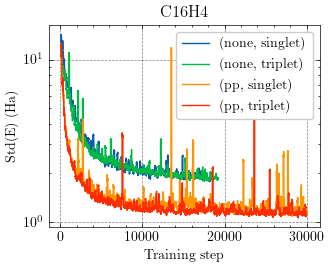

In [6]:
for label, run in runs.items():
    run['singlet']['opt/E_std'].rolling(100).mean().plot(label=(label, 'singlet'))
    run['triplet']['opt/E_std'].rolling(100).mean().plot(label=(label, 'triplet'))
plt.legend()
plt.ylabel('Std(E) (Ha)')
# plt.ylim(-10, 50)
plt.yscale('log')
plt.xlabel('Training step')
plt.title('C16H4')